In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/movies_train.csv'
df = pd.read_csv(url)
col_discription = ['제목', '배급사', '장르', '개봉일', '상영시간', '상영등급', '감독이름', '감독 이전 작품 평균 관객수','감독 이전 작품수', '스탭 수', '주연배우수','관객 수'
                   ]
df.columns
pd.DataFrame(col_discription, index=df.columns)
'제목', '배급사', '장르', '개봉일', '상영시간', '상영등급', '감독이름', '감독 이전 작품 평균 관객수','감독 이전 작품수', '스탭 수', '주연배우수','관객 수'

('제목',
 '배급사',
 '장르',
 '개봉일',
 '상영시간',
 '상영등급',
 '감독이름',
 '감독 이전 작품 평균 관객수',
 '감독 이전 작품수',
 '스탭 수',
 '주연배우수',
 '관객 수')

In [3]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

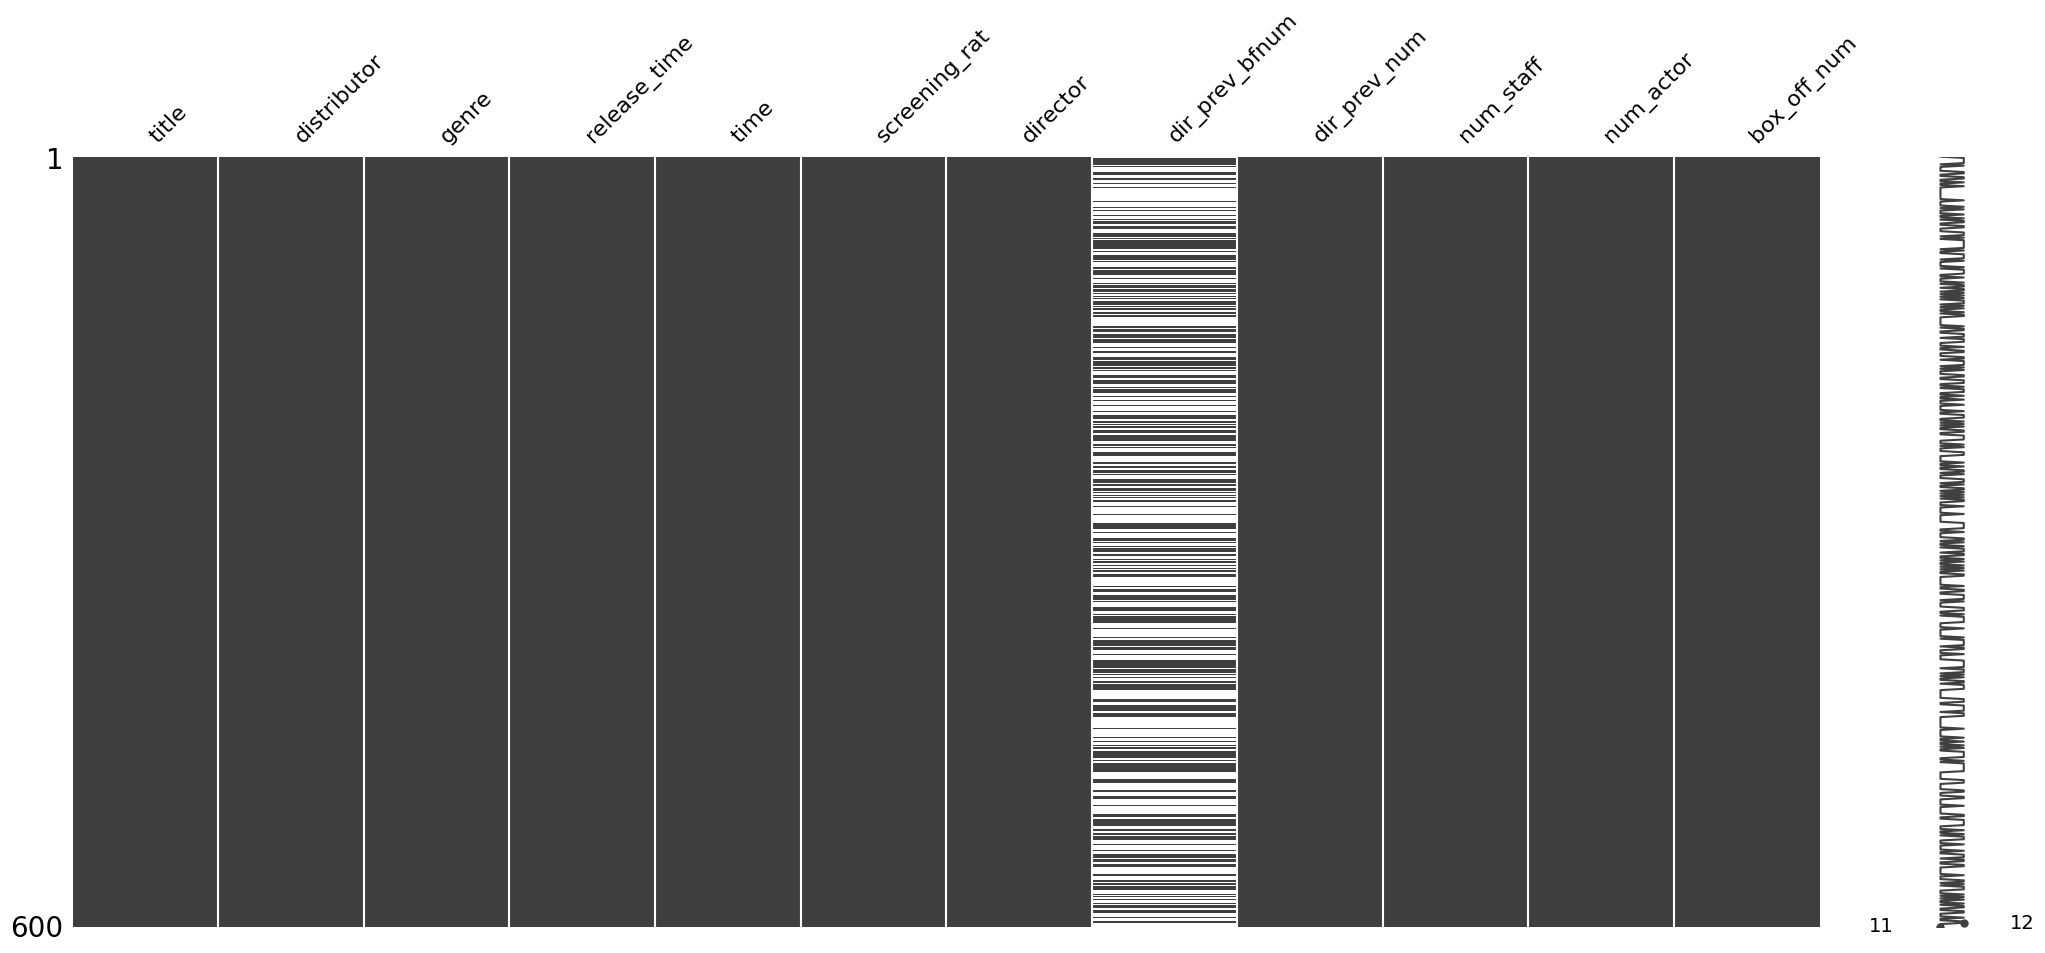

In [ ]:
# 결측치 찾기
import missingno as msno
msno.matrix(df)

In [5]:
df.isna().mean()

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [6]:
# 결측치가 없는 데이터의 감독은?
# 결측치 주변 데이터를 확인 - 살릴지 죽일지
# 결측치가 생긴 원인 파익? - 이전 영화가 없는 감독이면 .. 정상적인 데이터


In [18]:
df = df.fillna(0)
df.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
df[df['dir_prev_bfnum'].isna()]

In [9]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


<Axes: >

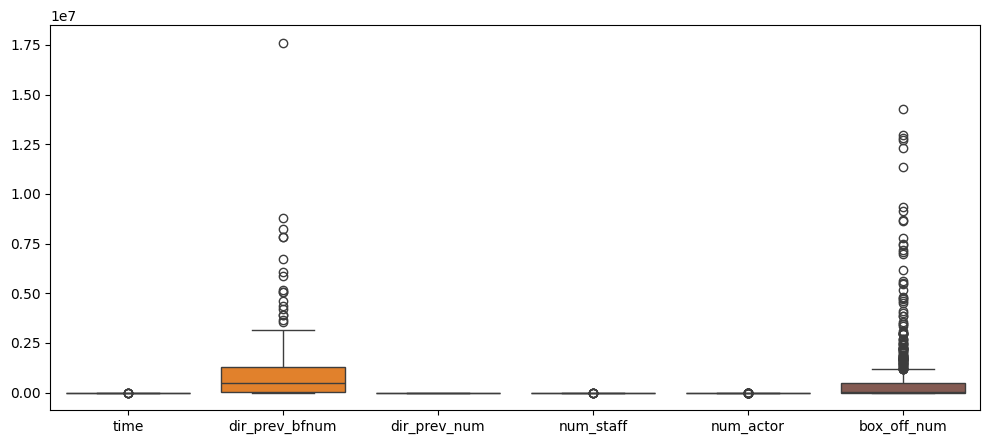

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

In [12]:
# 데이터 분포 특성
# 왼쪽으로 치우쳐져서 오른쪽 꼬리가 긴 형태 (대부분의 관객수는 5만명대에 형성되어 있고)
# outlier가 많고 크다 즉, 히트작의 영향이 크다

<Axes: >

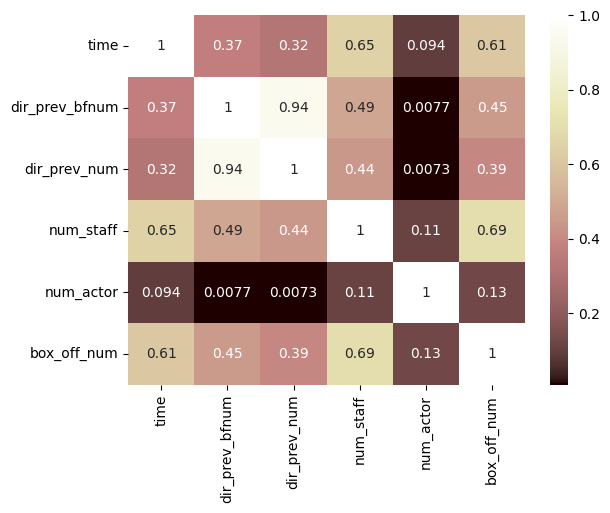

In [21]:
# 관객수 box_off_num과 높은 상관관계를 가지는 변수를
corr = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr, annot = True,cmap='pink')

In [22]:
# 관객 수는 상영시간과 스탭수에 높은 상관관계를 보인다.
    # 상영시간이 길수록 관객 수가 증가하는 경향

In [24]:
print(df['box_off_num'].corr(df['time']))
print(df['box_off_num'].corr(df['time'],method='spearman'))

0.44145239154082855
0.6094410730461675


상관계수
'''
상관계수는 두 변수간의 관계 강도와 방향을 측정
피어슨 상관계수: 선형 관계를 측정, 데이터가 정규분포를 따르고 선형일 때
스피어만 상관계수: 순위기반, 비선형관계나 또는 순서데이터(예; 순위, 크기 : 모두 -1과 1사이의 값)
'''

피어슨 상관계수
두 변수 x,y의 공분산을 각 변수의 표준편차로 나눈 값
1. 각 변수의 평균 계산
2. 각 데이터 포인트에서 평균을 뺀 값을 계산 : 편차
3. 편차들의 곱 합(공분산 분자 계산)
4. 각 편차 제곱합 계산
5. 분자 / (분모의 제곱근)으로 계산

데이터가 연속적이고 선형적일 때 사용
'''

In [ ]:
스피어만 상관계수
'''
두 변수의 순위(rank)를 변환한 후 적용 - 실제 데이터 값 대신에 순위를 사용
'''

'''
1. 각 변수 x와 y의 데이터를 오름차순으로 정렬해 순위 부여(동점 평균순위 사용)
2. 각 데이터 쌍의 순위 차이(di = rankx - ranky)


'''
이상치나 비선형 관계에 적합



In [ ]:
# x(온도)  y(아이스림 판매량)
import numpy as np
X = np.array([20,25,30,360,400])
y = np.array([10,15,20,25,30])

x_mean = X.mean()
y_mean = y.mean()
# x y 편차
x_ = X - x_mean
y_ = y - y_mean
# 편차 곱 합
(x_ *  y_).sum()
# x편차의 제곱의 합
(x_**2).sum() , (y_**2).sum()
# 분모
(x_**2).sum() * (y_**2).sum()
np.sqrt((x_**2).sum() * (y_**2).sum())


(x_ *  y_).sum() / np.sqrt((x_**2).sum() * (y_**2).sum())

In [ ]:
import matplotlib.pylab as plt
X = np.array([20,25,30,360,400])
y = np.array([10,15,20,25,30])

plt.scatter(X,y)

In [ ]:
# 스피어만 상관계수
X = np.array([20,25,30,360,400])
y = np.array([10,15,20,25,30])

rank_x = [1,2,3,4,5]
rank_y = [1,2,3,4,5]
# 순위차이
di = [0,0,0,0,0]  # 모두 동일 순위
# 분자 0
# 1 - (0 / 5(25-1))
1 - (0 / 5*(25-1))